# DFA: Basics, and Designing Them (Ch 4)

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_DFA    import *
from jove.LangDef    import *  # for testing DFA actions
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 4707, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 4707 (delta 40), reused 50 (delta 22), pack-reused 4634
Receiving objects: 100% (4707/4707), 7.48 MiB | 24.87 MiB/s, done.
Resolving deltas: 100% (3045/3045), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(

# What are DFA?

DFA are mechanisms to specify a simple yet powerful family of languages called
Regular Languages. Below, we define Regular Languages. Then we present how DFA
help define regular languages in two ways: One via Graphs, and the other via
Symbol and String Transition Functions.

In [2]:
help(md2mc)

Help on function md2mc in module jove.Def_md2mc:

md2mc(src='None', fname='None')
    md2mc converts a markdown source to a machine (mc).
    
    One can feed the markdown in three ways, shown via 
    pseudo-examples:
    
    1) md2mc()
    
       It means you will provide a file-name
       (you will be prompted for one). Then the markdown is read from
       that file. 
       
    2) md2mc(src="<any string S other than 'File'>")
    
       S is now taken as the markdown string and parsed. This is 
       bound to be a multi-line file. 
       
       There is a Jupyter bug that if the parser (or any process) 
       consuming a multi-line input throws an exception, you will get 
       a strange error message: 
       ERROR:root:An unexpected error occurred while tokenizing input
       Ignore it please, and instead spend your time fixing the 
       markdown input. See for details:
       https://github.com/ipython/ipython/issues/6864
       
       
    3) md2mc(src="File", f

In [3]:
i_jDivisibleByThree= md2mc('''DFA

IF : a -> S_ad  !! d denotes no more accepting either a or b
IF : b -> S_db  !! no more accepting a's (0 a % 3 = 0)

Sab : a -> Saab  !! Saba functionally the same as Saab, keep lexicographic order
Sab : b -> Sabb

Saab : a -> S_db  !! d denotes no more accepting a's
Saab : b -> Saabb

Sabb : a -> Saabb  !! Sabba functionally the same as Saabb
Sabb : b -> S_ad   !! d denotes no more accepting b's

S_db : a -> Sab   !! a % 3 was 0, now it is 1, along with 1 b (Sab)
S_db : b -> S_dbb

S_ad : a -> S_aad
S_ad : b -> Sab  !! b % 3 was 0, now it is 1, along with 1 a (Sab)

Saabb : a -> S_dbb  !! pattern continues
Saabb : b -> S_aad

S_aad : a -> IF
S_aad : b -> Saab

S_dbb : a -> Sabb
S_dbb : b -> IF

''')

Generating LALR tables


In [4]:
print(i_jDivisibleByThree)

{'Q': {'Sabb', 'S_dbb', 'S_ad', 'Sab', 'S_aad', 'IF', 'Saab', 'Saabb', 'S_db'}, 'Sigma': {'b', 'a'}, 'Delta': {('IF', 'a'): 'S_ad', ('IF', 'b'): 'S_db', ('Sab', 'a'): 'Saab', ('Sab', 'b'): 'Sabb', ('Saab', 'a'): 'S_db', ('Saab', 'b'): 'Saabb', ('Sabb', 'a'): 'Saabb', ('Sabb', 'b'): 'S_ad', ('S_db', 'a'): 'Sab', ('S_db', 'b'): 'S_dbb', ('S_ad', 'a'): 'S_aad', ('S_ad', 'b'): 'Sab', ('Saabb', 'a'): 'S_dbb', ('Saabb', 'b'): 'S_aad', ('S_aad', 'a'): 'IF', ('S_aad', 'b'): 'Saab', ('S_dbb', 'a'): 'Sabb', ('S_dbb', 'b'): 'IF'}, 'q0': 'IF', 'F': {'IF'}}


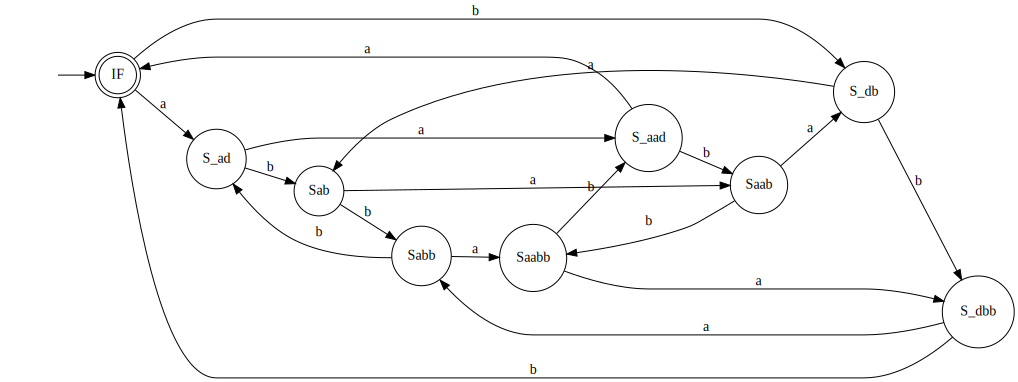

In [5]:
dotObj_dfa(i_jDivisibleByThree)

## From Languages to Regular Languages

We will now study __regular languages__. 

L is a regular language if L has a DFA. 

L is a regular language if there is a DFA D such that D accepts *all* and *only* those strings in L.

## DFA as Graphs: Define Regular Languages

DFA drawings are graphs. A string w is in a DFA D's language if there is a path from the initial state to *a* final state of D labeled by w.

## DFA as Symbol and String Transition Functions

A DFA is a quintuple $(Q, \Sigma, \delta, q_0, F)$. Its Python encoding looks as below.

In [6]:
Fig34 = {
 'Q': {'A', 'F', 'I'},
 'Sigma': {'0', '1'},
 'Delta': {('A', '0'): 'I',
  ('A', '1'): 'I',
  ('F', '0'): 'I',
  ('F', '1'): 'I',
  ('I', '0'): 'A',
  ('I', '1'): 'F'},
 'q0': 'I',
 'F': {'F'}
}

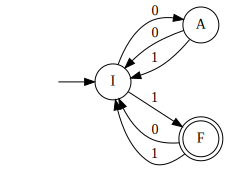

In [7]:
dotObj_dfa(Fig34)

## A prettier diagram is obtained by fusing edges

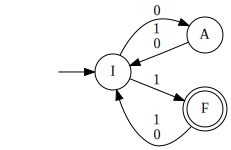

In [41]:
dotObj_dfa(Fig34, FuseEdges=True)

# The same DFA in automd (Jove's markdown)

Study Overview_Of_CS3100_Fall2020/ and its contents to fully learn how to define a DFA via a markdown.
You can study the animation panel which also explains the markdown syntax fully.


In [11]:
from jove.JoveEditor import *
JoveEditor(examples=True)
display(HTML('<link rel=\"stylesheet\" href=\"//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css\"/>'))

 "help(JoveEditor)" gives you info on the generic animation panel that animates all machines. 


Assignment 2

A language defined over an alphabet set {a, b} such that it accepts all the strings that ends with "bab".

L = {'bab', 'abab', 'bbab', 'aabab', 'abbab', 'babab', 'bbbab', ... }.


In [47]:
LendsWith_bab= md2mc('''DFA

I : a -> I !!since string can start with any no. of times of a.
I : b -> Q1 !!we, want ending string to be bab so firstly we go to 'b'.

Q1 : a -> Q2 !!we, want ending string to be bab so secondly we go to 'a'.
Q1 : b -> Q1 !!self loop since, b can repeat any time before 'ab' and still end with 'bab'

Q2 : a -> I !!if we get 'a' again at this state we need 'bab' again, so we go to I state.
Q2 : b -> F !!we, want ending string to be bab so lastly we go to 'b'.

F : a -> Q2 !!if we get an 'a' at F, then we reached F by recieving 'b' from Q2 and if we get 'a' the we are left with 'ba' and going to Q2 would work and end with 'bab'
F : b -> Q1 !!if we get 'b' at F, then we need 'ab' at the end so we can go to Q1 and get 'bab' at the end.

''')

In [48]:
print(LendsWith_bab)

{'Q': {'Q1', 'F', 'Q2', 'I'}, 'Sigma': {'b', 'a'}, 'Delta': {('I', 'a'): 'I', ('I', 'b'): 'Q1', ('Q1', 'a'): 'Q2', ('Q1', 'b'): 'Q1', ('Q2', 'a'): 'I', ('Q2', 'b'): 'F', ('F', 'a'): 'Q2', ('F', 'b'): 'Q1'}, 'q0': 'I', 'F': {'F'}}


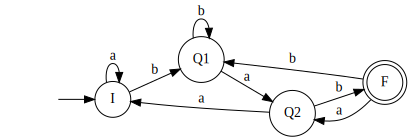

In [49]:
dotObj_dfa(LendsWith_bab)

There isn't any transition for both the symbols going to a same state, so "FuseEdges=True" would produce same result as above.

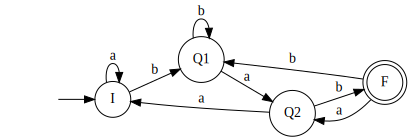

In [50]:
dotObj_dfa(LendsWith_bab, FuseEdges=True)

In [46]:
from jove.JoveEditor import *
JoveEditor(examples=True)
display(HTML('<link rel=\"stylesheet\" href=\"//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css\"/>'))